# Data Reader

[tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) is used for data I/O. The old `feed_dict` argument is the least recommend way now.

Let's use the patches extracted from [extract patches](extract_patches.ipynb) as an example here.

In [1]:
# this is for path management in jupyter notebook
# note necessary if you're running in terminal or other IDEs
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from preprocess import patchExtractor
from collection import collectionMaker

In [3]:
# define parameters
patch_size = (550, 550)
tile_size = (5000, 5000)
ds_name = 'inria_demo'
overlap = 100
pad = 100

In [4]:
# get file list
cm = collectionMaker.read_collection(ds_name)
file_list = cm.load_files(field_ext='RGB,gt_d255') # we need to have ground truth at last
chan_mean = cm.meta_data['chan_mean'][:3]
patch_list = patchExtractor.PatchExtractor(patch_size, tile_size, ds_name, overlap, pad).\
    run(file_list=file_list, file_exts=['jpg', 'png'], force_run=False).get_filelist()

In [5]:
from reader import reader_utils, dataReaderSegmentation

/home/lab/anaconda3/envs/tf-aml/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
# get reader functions
init_op, reader_op = dataReaderSegmentation.DataReaderSegmentation(
    patch_size, # size of the patches
    patch_list, # list of lists of all the patch files
    has_gt=True, # the input data include gt channel
    gt_dim=1, # gt in inria is single channel
    include_gt=True, # output gt in reader
    chan_mean=chan_mean, # mean of the non-gt channels
    is_train=False, # this is not used for training
    aug_func=[reader_utils.image_flipping, reader_utils.image_rotating]).read_op()

Now we've had the reader operations, these operations can be executed in tf.Session.

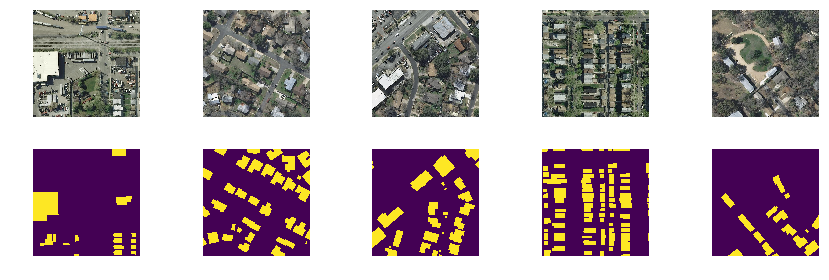

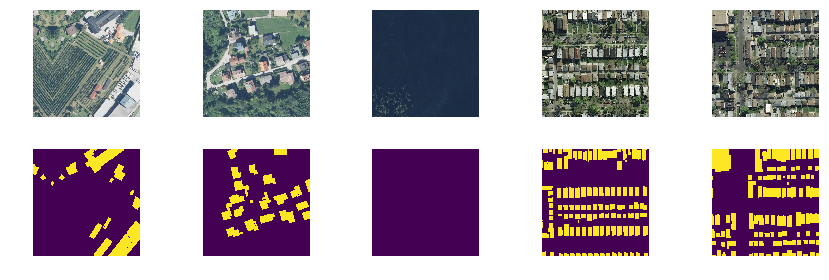

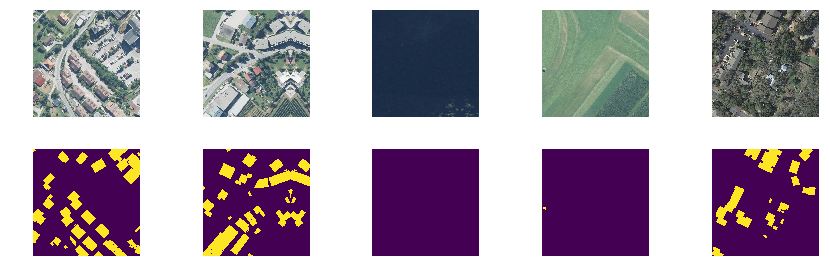

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

with tf.Session() as sess:
    sess.run(init_op)

    for cnt in range(3):
        img, lbl = sess.run(reader_op)

        plt.figure(figsize=(12, 4))
        for i in range(5):
            plt.subplot(2, 5, 1+i)
            plt.imshow((img[i, :, :, :]+chan_mean).astype(np.uint8))
            plt.axis('off')
            plt.subplot(2, 5, 6+i)
            plt.imshow(lbl[i, :, :, 0].astype(np.uint8))
            plt.axis('off')
        plt.tight_layout()
        plt.show()